# Split the data (70% Train / 30% Test)

In [1]:
import os
import csv
import random
import matplotlib.pyplot as plt
import text_package

list_txt = []
file_type = ""
ham = []
spam = []

HAM = 'ham'
SPAM = 'spam'
HEADER = ('path', 'type')

# Create a csv file containing the data: the path in the first column and the class in the second
with open('dataset.csv', 'w', newline='') as dataset:
    writer_list = csv.writer(dataset)
    writer_list.writerow(HEADER)
    for root, _, files in os.walk("Data"):
        for file in files:
            file_path = os.path.join(root, file)
            if file.endswith(".txt"):
                if (SPAM in file) or (HAM in file):
                    file_type = os.path.basename(os.path.normpath(root))
                    writer_list.writerow((file_path, file_type))

# Use the created csv file to create the train and test data set
with open('train.csv', 'w', newline='') as train,\
     open('test.csv', 'w', newline='') as test, \
     open('dataset.csv', 'r') as data_list:
    reader_list = csv.reader(data_list)

    # Get the ham and spam lists
    for rows in reader_list:
        if rows[1] == HAM:
            ham.append(rows[0])
        elif rows[1] == SPAM:
            spam.append(rows[0])

    # Randomize the lists and compute 70% of their size
    random.shuffle(ham)
    random.shuffle(spam)
    ham_len_70 = int(len(ham)*0.7)
    spam_len_70 = int(len(spam)*0.7)

    # Separate the ham and spam data by a 70/30 ratio between train and test, respectively
    ham_train = ham[:ham_len_70]
    ham_test = ham[ham_len_70:]
    spam_train = spam[:spam_len_70]
    spam_test = spam[spam_len_70:]

    # Fill the cvs's. Same format: path and then class
    writer_train = csv.writer(train)
    writer_test = csv.writer(test)
    writer_train.writerow(HEADER)
    writer_test.writerow(HEADER)
    for hm_tr in ham_train:
        writer_train.writerow((hm_tr, HAM))
    for spm_tr in spam_train:
        writer_train.writerow((spm_tr, SPAM))
    for hm_tst in ham_test:
        writer_test.writerow((hm_tst, HAM))
    for spm_tst in spam_test:
        writer_test.writerow((spm_tst, SPAM))

# Calculate the size of several data sets and set their respective label
stats = [len(ham+spam), len(ham), len(spam), len(ham_train), len(ham_test), len(spam_train), len(spam_test),
         len(ham_train)+len(spam_train), len(ham_test)+len(spam_test)]
set_labels = ['Total dataset', 'Total ham set', 'Total spam set', 'Train ham', 'Test ham', 'Train spam', 'Test spam', 
              'Training Set', 'Test set']

# Show the data sets' size
for idx, stat in enumerate(stats):
    print(set_labels[idx], ':', stat)

Total dataset : 33716
Total ham set : 16545
Total spam set : 17171
Train ham : 11581
Test ham : 4964
Train spam : 12019
Test spam : 5152
Training Set : 23600
Test set : 10116


# Get statistics on the sets

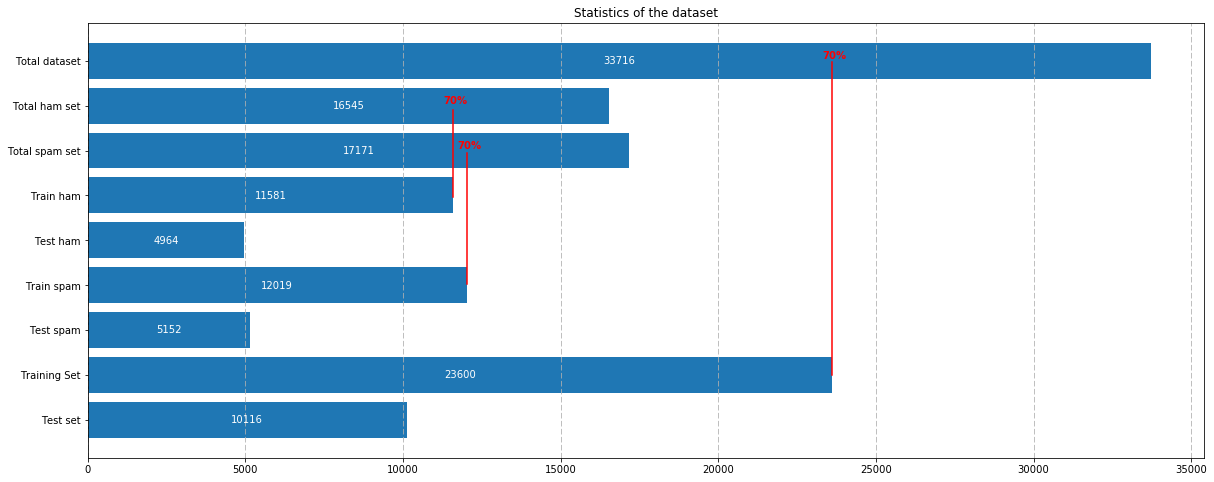

In [2]:
# Plot the splitting result of the data
stats_index = range(len(stats))
fig, ax = plt.subplots(figsize=(20, 8))
plt.barh(stats_index, stats, 0.8)
plt.title("Statistics of the dataset")
ax.set_yticks(stats_index)
ax.set_yticklabels(set_labels)
# Draw a 70% line using the original set to show the split
ax.axvline(int(len(ham)*0.7), 0.6, 0.8, color='r')
ax.axvline(int(len(spam)*0.7), 0.4, 0.7, color='r')
ax.axvline(int(len(ham+spam)*0.7), 0.19, 0.91, color='r')
ax.text(int(len(ham)*0.7)-300, 0.95, '70%', color='r', weight='bold')
ax.text(int(len(spam)*0.7)-300, 1.95, '70%', color='r', weight='bold')
ax.text(int(len(ham+spam)*0.7)-300, -0.05, '70%', color='r', weight='bold')
# Write the values on each bar
for stats_tick, value in enumerate(stats):
    ax.text(value/2, stats_tick, str(value), color='white', horizontalalignment='center', verticalalignment='center')
ax.xaxis.grid(True, linestyle='--')
plt.gca().invert_yaxis()
plt.show()